<a href="https://colab.research.google.com/github/sumithgs/Regression-model-for-Boston-dataset/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem statement**
Apply PCA on the Boston housing dataset. Using a single feature use regression to develop a model, and calculate mean error. 

##**Extensions**

In [ ]:
%reload_ext google.colab.data_table
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

# **Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns 
sns.set(style="white")
import numpy as np
from scipy.linalg import eigh

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **loading the data**

In [ ]:
from sklearn.datasets import load_boston
dataset = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
dataset['MEDV'] = pd.DataFrame(load_boston().target)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


##**About Data**

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. The dataset has 506 cases and its attribute are
CRIM - per capita crime rate by town

**ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS** - proportion of non-retail business acres per town.

**CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

**NOX** - nitric oxides concentration (parts per 10 million)

**RM** - average number of rooms per dwelling

**AGE** - proportion of owner-occupied units built prior to 1940

**DIS** - weighted distances to five Boston employment centres

**RAD** - index of accessibility to radial highways

**TAX** - full-value property-tax rate per 10,000

**PTRATIO** - pupil-teacher ratio by town

**B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**LSTAT** - per lower status of the population

**MEDV** - Median value of owner-occupied homes in $1000's

## **Looking for the missing values**

In [ ]:
dataset.isna().sum()
# if we get isnull sum as zero means there are no missing values in dataset

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## **Function for scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(dataset.iloc[:,:-1])
y = sc.fit_transform(np.c_[dataset.iloc[:,-1]])
# standard scalar library will scale the data to -1 to 1 to get a stable model

##**Plotting data**

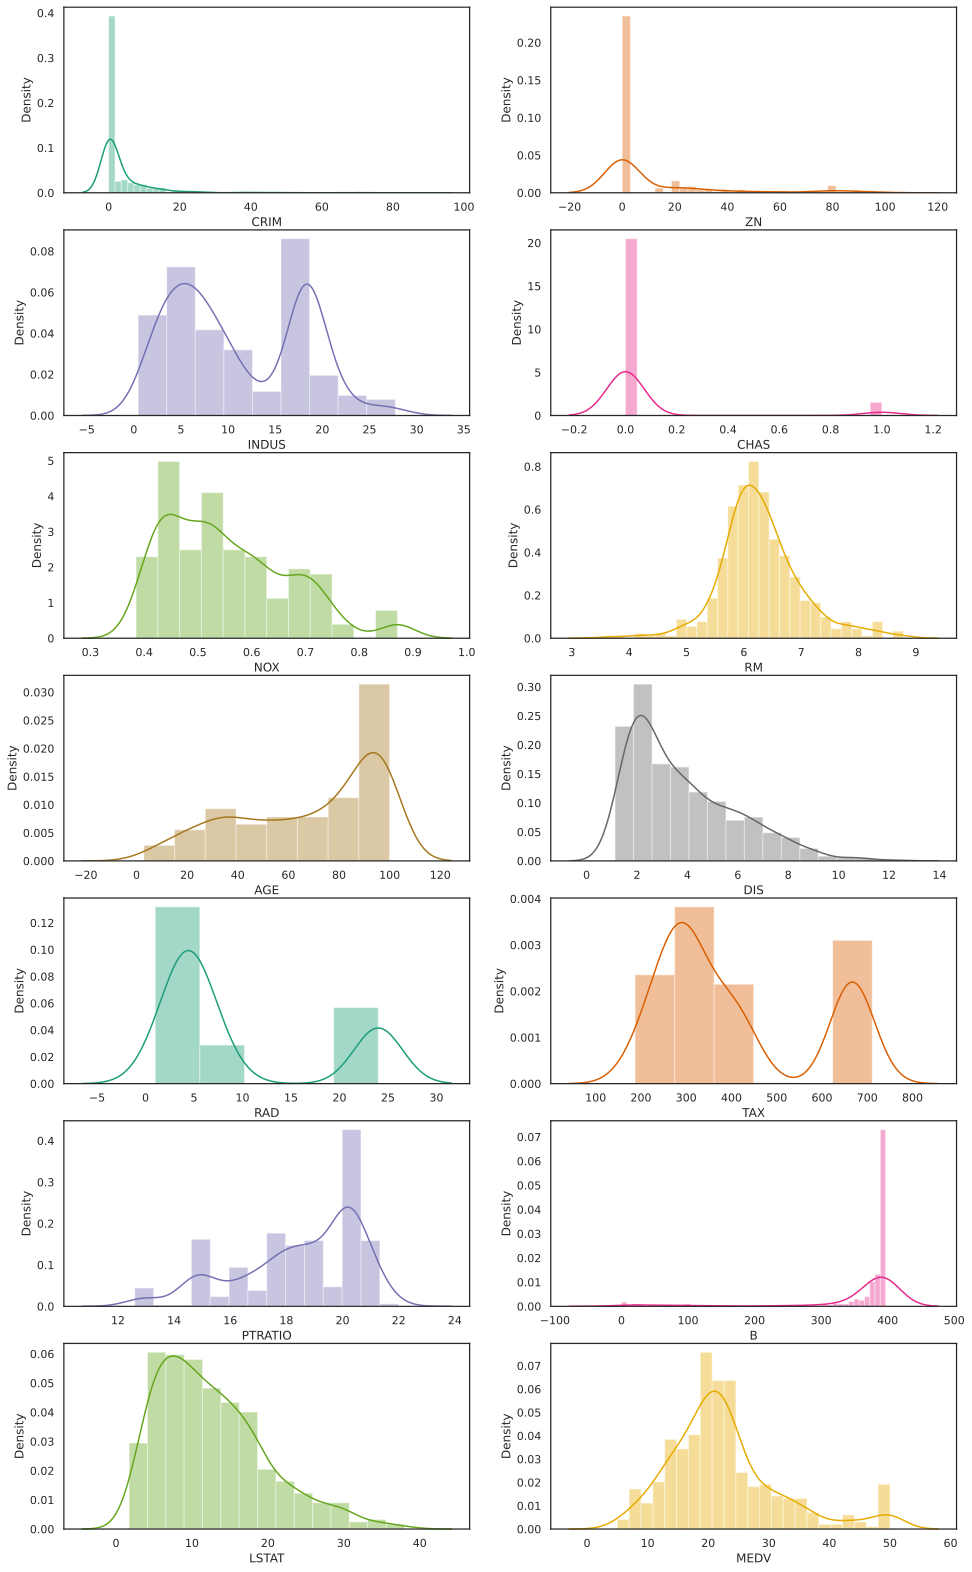

In [ ]:
pos = 1
palette = iter(sns.color_palette("Dark2",len(dataset.columns)))
fig = plt.figure(figsize=(16,28))
for i in dataset.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(dataset[i],ax=ax,color=next(palette))

##**Principal Component Analysis**

*   PCA is a mathematical procedure, which 
takes a few linearly correlated features and returns few uncorrelated features.

*   It is often used in dimensionality reduction for reducing complexity of learning models or to visualize the multidimensional data into 2D or 3D data, making to easy to visualize.

##**Collinearity or Multicollinearity**
In statistics, multicollinearity is a phenomenon in which one feature variable in a regression model is highly linearly correlated with another feature variable.
>
A collinearity is a special case when two or more variables are exactly correlated.


##**Why is PCA required?**
  In our dataset there is lot of collinearity between our predictor variables which can make our model unstable.
> 
  This is not good, as multicollinearity can make our model unstable, we need to look at it a little more, before modeling our data.

##**Checking the correlation matrix**
Correlation is a statistical measure. It explains how one or more variables are related to each other.

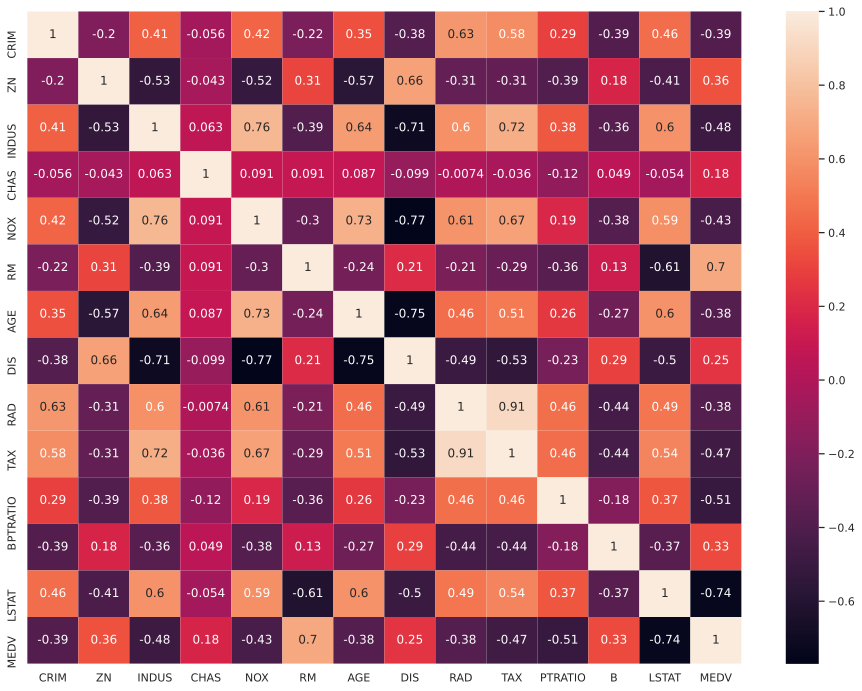

In [ ]:
#Heatmap which shows correlation matrix of our data.
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(dataset.corr(),annot=True)

##**Variance Inflation Factor**

A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model.
>
It’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

![Picture](https://docs.google.com/uc?id=1y4i3sFVPXtVvLVYHJfz_8BcNRwdkjKOJ)


where R square is co-efficient of determination
>
![Picture](https://docs.google.com/uc?id=1vWD7kvo0rWH9vsYo21riKwOgr1sLkWOR)

If VIF < 4 its okay to be used, other wise we need to remove the collinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = dataset.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dataset.values, i)
                          for i in range(len(dataset.columns))]
vif_data.sort_values(by='VIF') 

,feature,VIF
3,CHAS,1.176266
0,CRIM,2.131404
1,ZN,2.910004
12,LSTAT,12.615188
2,INDUS,14.485874
8,RAD,15.369980
7,DIS,15.430455
11,B,21.351015
6,AGE,21.398863
13,MEDV,24.503206


##**Applying PCA**

In [ ]:
# since we have used standardScalar library we need not worry about matrix format

#Finding the Covarience Matrix
covar_mat = np.matmul(X.T,X)

#Finiding the eigen values of the Covarience Matrix
values,vectors=eigh(covar_mat)
vectors=vectors.T

#finding the matrix after performing pca
PCA_res=np.matmul(vectors,X.T)

PCA_res=PCA_res.T

#converting the matrix to dataframe to plot the results
PCA_df=pd.DataFrame(data=(PCA_res),columns=load_boston().feature_names)
PCA_df['MEDV'] = y

##**Plotting data after applying PCA**
PCA gives you **normal distribution** which are uncorrolated from other **predictor variables** which will give us stable **regression model**.

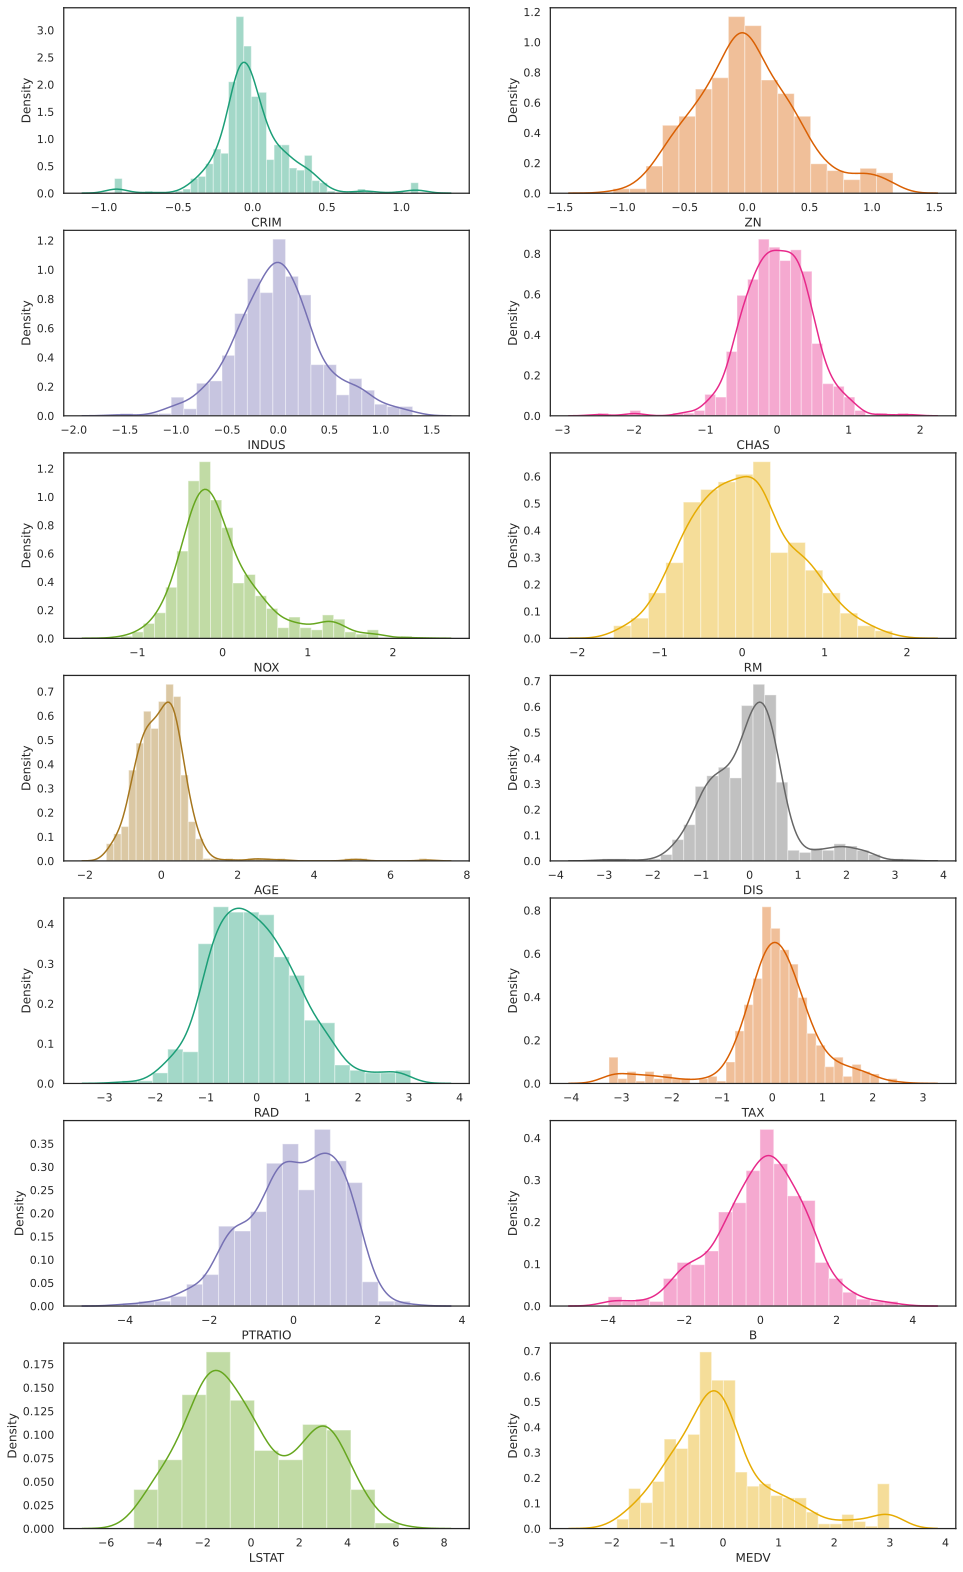

In [ ]:
pos = 1
palette = iter(sns.color_palette("Dark2",len(PCA_df.columns)))
fig = plt.figure(figsize=(16,28))
for i in PCA_df.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(PCA_df[i],ax=ax,color=next(palette))

##**Looking at the correlation matrix**
###### The reason correlation between predictor variable and target varaiable is in sorted order is because, PCA takes all the explained variation and puts it into first components, and repeats the process. The new feature are in no way related to the old ones

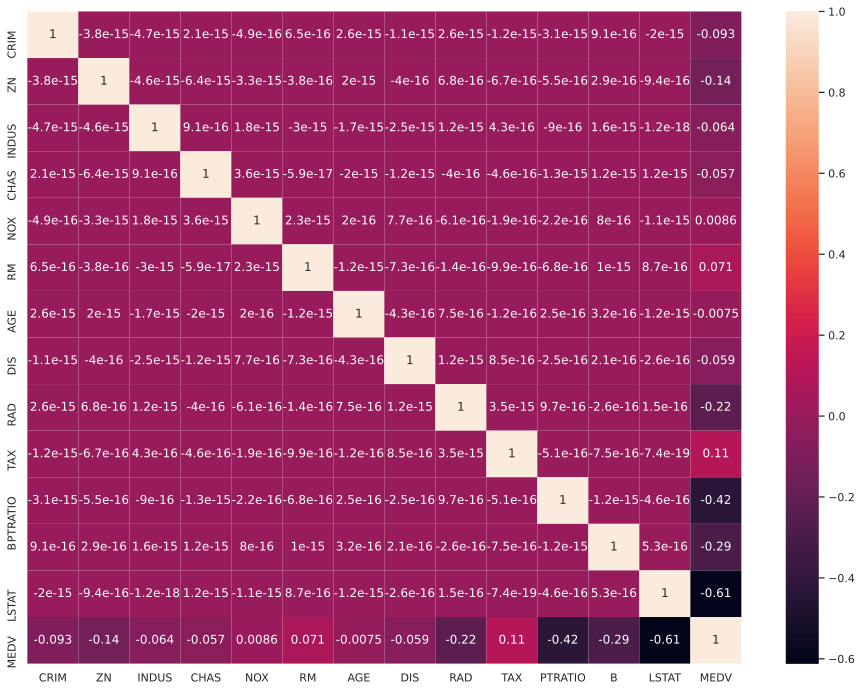

In [ ]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(PCA_df.corr(),annot=True)

## **Checking the Variation inflation factor**

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = PCA_df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(PCA_df.values, i)
                          for i in range(len(PCA_df.columns))]
vif_data.sort_values(by='VIF') 

,feature,VIF
6,AGE,1.000217
4,NOX,1.000282
3,CHAS,1.012340
7,DIS,1.013477
2,INDUS,1.016000
5,RM,1.019535
0,CRIM,1.033111
9,TAX,1.045653
1,ZN,1.073390
8,RAD,1.189758


##**Linear Regression model**

**Line equation**:

**y = W * x + B **

where,

W = **weight** or slope of the equation.

B = **Bias** or constant.

**Cost function**
![Picture](https://raw.githubusercontent.com/sumithgs/My_Media_Files/master/for%20mlp/cost1.jpg)
It is the sum of the difference between actual and approximated value square by number of samples.
![Picture](https://raw.githubusercontent.com/sumithgs/My_Media_Files/master/for%20mlp/cost2.jpg)

**Gradient dedcent**

It is an iterative method to get the minimum gradient.

![Picture](https://raw.githubusercontent.com/sumithgs/My_Media_Files/master/for%20mlp/grad%20graph.jpg)

To get the least gradient after each iteration there is a update rule.

![Picture](https://raw.githubusercontent.com/sumithgs/My_Media_Files/master/for%20mlp/updating%20weights.jpg)
![Picture](https://raw.githubusercontent.com/sumithgs/My_Media_Files/master/for%20mlp/updating%20weights2.jpg)
where alpha is the learning rate
![Picture](https://raw.githubusercontent.com/sumithgs/My_Media_Files/master/for%20mlp/learning%20rate.jpg)
If we have small learning rate we might take longer time to calculate the least gradient but we get accurate and the least gradient possible. If we use big learning rate we might not get the least possible gradient required.

In [ ]:
class LinearRegression:
  def __init__(self, learning_rate=0.001, n_iters=1000):
    self.lr = learning_rate
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape
    # init parameters
    self.weights = np.zeros(n_features)
    self.bias = 0

    # gradient descent
    for _ in range(self.n_iters):
      y_predicted = np.dot(X, self.weights) + self.bias
      # compute gradients
      dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
      db = (1 / n_samples) * np.sum(y_predicted - y)
      # update parameters
      self.weights -= self.lr * dw
      self.bias -= self.lr * db
 

  def predict(self, X):
    y_approximated = np.dot(X, self.weights) + self.bias
    return y_approximated

##**Spliting the dataset to training and testing data**
we are using LSTAT - per lower status of the population because it is giving us good accuracy

In [ ]:
from sklearn.model_selection import train_test_split
X1 = pd.DataFrame(PCA_df['LSTAT'])
Y1 = PCA_df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.4, random_state = 0)

##**Training the model on training set**

In [ ]:
regressor = LinearRegression(learning_rate=0.001, n_iters=5000)
regressor.fit(X_train, y_train)

##**Predicting the test set results**

In [ ]:
predictions = regressor.predict(X_test)

##**What is RMSE?**
Root Mean Square Error (RMSE) is a standard way to measure the error of a model in predicting quantitative data. Formally it is defined as follows:
>
![Picture](https://raw.githubusercontent.com/sumithgs/My_Media_Files/master/for%20mlp/Screenshot%202021-05-14%20193917.jpg)
>
R2 score

It is the proportion of the variance in the dependent variable that is predictable from the independent variables.
It varies between 0 and 100%. So if it is 100%, then the two variables are perfectly correated.

##**Checking the accuracy of the model**

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2 = r2_score(y_test, predictions)
mse = np.sqrt(mean_squared_error(y_test, predictions))
print('R2 Score is : {}% | Root Mean Square Error is : {}'.format(r2*100,mse))

R2 Score is : 33.68482712781841% | Root Mean Square Error is : 0.8061537398814976


##**Reason for low value getting low accuracy**

Accuracy is nothing but r2_score which is 33% approx. Since 'y' variable is dependant on predictor variable 'x',so the less predictor variable we use less the accuracy.

##**Results using more predictor variables**

In [ ]:
from sklearn.model_selection import train_test_split
X1 = pd.DataFrame(PCA_df.drop('MEDV',axis=1))
Y1 = PCA_df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.4, random_state = 0)

regressor = LinearRegression(learning_rate=0.001, n_iters=5000)
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2 = r2_score(y_test, predictions)
mse = np.sqrt(mean_squared_error(y_test, predictions))
print('R2 Score is : {}% | Root Mean Square Error is : {}'.format(r2*100,mse))

R2 Score is : 68.4137339750659% | Root Mean Square Error is : 0.556365977445444


As you can see when we use all the features of the dataset we improve the accuracy to 68%.

##**Conclusion**
Our results are affected due to two factors:
1. Collinearity: 
collinearity will not affect the results of predictions from the models. But it is important that how each feature may be affected by another.

2. Linear Regression model:
  *   Linear Regression is sensitive to Outliers. Outliers are the data that not usual. They can uni or multivariate. Example: Lions weigh around 150 to 250 KG, Lion whose weight is < 150 or > 250 are called as outliers because they don't occur normally.
![Picture](https://raw.githubusercontent.com/sumithgs/My_Media_Files/master/for%20mlp/outliers.jpeg)
  * Data Must Be Independent: Linear regression assumes that the data are independent which means one feature is nt dependent on the other. Example: score of one subject is independent of the other subject. But this is not the case always.







In [ ]:
!jupyter nbconvert --to markdown ML_project.ipynb